# Questions

- [X] What is the better day to post?

To get started, let's read in the necessary libraries we will need to wrangle our data: pandas and numpy. If we decided to build some basic plots, matplotlib might prove useful as well.

In [17]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime

plt.rcParams["figure.figsize"] = (10, 10)

pd.set_option('display.max_colwidth', None)

df = pd.read_csv('medium-data-science-articles-2021.csv')


df.shape
df.head()

,url,title,author,author_page,subtitle,claps,responses,reading_time,tag,date
0,https://medium.com/@dharmeshpanchmatia/data-analytics-and-ai-ml-platform-for-ecommerce-68639df89c7f,Data Analytics and AI/ML platform for eCommerce,dharmeshpanchmatia,https://medium.com/@dharmeshpanchmatia,Improve user pr,30.0,0.0,5.0,Big Data,2021-01-01
1,https://medium.com/predict/the-journey-from-an-apple-silicon-m1-powered-laptop-to-an-amd-ryzen-threadripper-3-desktop-6315252ac9d1,The journey from an Apple Silicon M1 powered laptop to an AMD Ryzen Threadripper 3 desktop.,dimitrisv,https://medium.com/@dimitrisv,NaN,42.0,0.0,5.0,Big Data,2021-01-01
2,https://medium.com/@rajsaraogi/demystifying-kpis-in-analytics-60084292412c,Demystifying KPIs in Analytics,rajsaraogi,https://medium.com/@rajsaraogi,NaN,19.0,0.0,3.0,Big Data,2021-01-01
3,https://medium.com/@bigdataschool/%D0%B1%D0%BE%D0%BB%D1%8C%D1%88%D0%B0%D1%8F-%D1%80%D0%B0%D0%B7%D0%BD%D0%B8%D1%86%D0%B0-%D1%87%D0%B5%D0%BC-%D1%81%D1%82%D1%80%D1%83%D0%BA%D1%82%D1%83%D1%80%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D0%B0%D1%8F-%D0%BF%D0%BE%D1%82%D0%BE%D0%BA%D0%BE%D0%B2%D0%B0%D1%8F-%D0%BF%D0%B5%D1%80%D0%B5%D0%B4%D0%B0%D1%87%D0%B0-%D0%B2-apache-spark-%D0%BE%D1%82%D0%BB%D0%B8%D1%87%D0%B0%D0%B5%D1%82%D1%81%D1%8F-%D0%BE%D1%82-spark-c3fcc3625679,Большая разница: чем структурированная потоковая передача в Apache Spark отличается от Spark Streaming,bigdataschool,https://medium.com/@bigdataschool,NaN,0.0,0.0,6.0,Big Data,2021-01-01
4,https://medium.com/@arnowa-44509/iot-a-new-way-of-life-249f69134af9,IoT: A New Way of Life,arnowa-44509,https://medium.com/@arnowa-44509,"IoT is more than just the Internet of things, it’s a network of new…",0.0,0.0,3.0,Big Data,2021-01-01


# Preparing data

## Find url duplicateds values and drop it

As same Url means same articles, let's remove it.

In [3]:
print(f' We have {df.url.duplicated().sum()} duplicated values in url colum')
df[df.url.duplicated(keep=False)]

 We have 1 duplicated values in url colum


,url,title,author,author_page,subtitle,claps,responses,reading_time,tag,date
24526,https://medium.com/@veronikabelokhvostova/im-a-data-scientist-here-s-why-i-work-at-facebook-a1fdb42fc8c4,"<strong class=""markup--strong markup--h3-strong""><em class=""markup--em markup--h3-em"">I’m a Data Scientist — Here’s why I work at Facebook</em></strong>",veronikabelokhvostova,https://medium.com/@veronikabelokhvostova,NaN,591.0,0.0,7.0,Data Science,2021-10-07
25593,https://medium.com/@veronikabelokhvostova/im-a-data-scientist-here-s-why-i-work-at-facebook-a1fdb42fc8c4,Facebook destroyed my family andmy mother and grandfather.,lexahe3185,https://medium.com/@lexahe3185,NaN,0.0,0.0,0.0,Data Science,2021-10-12


In [4]:
#  analysed the values and conclude that the correct duplicated values 
#is aways the first! So let's keep it.

df = df.drop_duplicates(subset=['url'], keep='first')
print(f' We have {df.url.duplicated().sum()} duplicated values in url column')
df.shape

 We have 0 duplicated values in url column


(47659, 10)

## Modeling Data

### labeling the data

As date dont indicate weekday, we must extract that info.

In [15]:
def get_week_day(date):
    date = str(date)
    year, month, day = (int(x) for x in date.split('-'))    
    
    return datetime.date(year, month, day).weekday()
  

df['weekday'] = df.date.apply(get_week_day)

## Get data insights

In [16]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,claps,responses,reading_time,weekday
claps,1.000000,0.399804,0.067828,-0.003416
responses,0.399804,1.000000,0.068732,0.004683
reading_time,0.067828,0.068732,1.000000,0.001833
weekday,-0.003416,0.004683,0.001833,1.000000


In [9]:
claps_count = {}
weekDays = ("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday")

for weeknumber, clap in zip(df.weekday, df.claps):
    weekday = weekDays[weeknumber]
    if weekday in claps_count.keys():
        claps_count[weekday]['total_claps'] += clap
        claps_count[weekday]['count'] += 1
    else:        
        claps_count[weekday] = {
            'total_claps' : clap,
            'count': 1,
            'week_number': weeknumber
        }

claps_count

{'Friday': {'total_claps': 359013.0, 'count': 7581, 'week_number': 4},
 'Saturday': {'total_claps': 222734.0, 'count': 4630, 'week_number': 5},
 'Sunday': {'total_claps': 196899.0, 'count': 4624, 'week_number': 6},
 'Monday': {'total_claps': 354164.0, 'count': 7647, 'week_number': 0},
 'Tuesday': {'total_claps': 385568.0, 'count': 8008, 'week_number': 1},
 'Wednesday': {'total_claps': 408845.0, 'count': 8223, 'week_number': 2},
 'Thursday': {'total_claps': 322049.0, 'count': 6946, 'week_number': 3}}

In [18]:
#Extract calps means for week days
for x in claps_count.values():
    x['clap_mean'] = x['total_claps']/ x['count']
    
claps_count

{'Friday': {'total_claps': 359013.0,
  'count': 7581,
  'week_number': 4,
  'clap_mean': 47.35694499406411},
 'Saturday': {'total_claps': 222734.0,
  'count': 4630,
  'week_number': 5,
  'clap_mean': 48.10669546436285},
 'Sunday': {'total_claps': 196899.0,
  'count': 4624,
  'week_number': 6,
  'clap_mean': 42.58196366782007},
 'Monday': {'total_claps': 354164.0,
  'count': 7647,
  'week_number': 0,
  'clap_mean': 46.314110108539296},
 'Tuesday': {'total_claps': 385568.0,
  'count': 8008,
  'week_number': 1,
  'clap_mean': 48.14785214785215},
 'Wednesday': {'total_claps': 408845.0,
  'count': 8223,
  'week_number': 2,
  'clap_mean': 49.71968867809802},
 'Thursday': {'total_claps': 322049.0,
  'count': 6946,
  'week_number': 3,
  'clap_mean': 46.3646703138497}}

In [19]:
df_weekday = pd.DataFrame(claps_count)
df_weekday = df_weekday.transpose()
df_weekday

,total_claps,count,week_number,clap_mean
Friday,359013.0,7581.0,4.0,47.356945
Saturday,222734.0,4630.0,5.0,48.106695
Sunday,196899.0,4624.0,6.0,42.581964
Monday,354164.0,7647.0,0.0,46.314110
Tuesday,385568.0,8008.0,1.0,48.147852
Wednesday,408845.0,8223.0,2.0,49.719689
Thursday,322049.0,6946.0,3.0,46.364670


Text(0, 0.5, 'Clap Means')

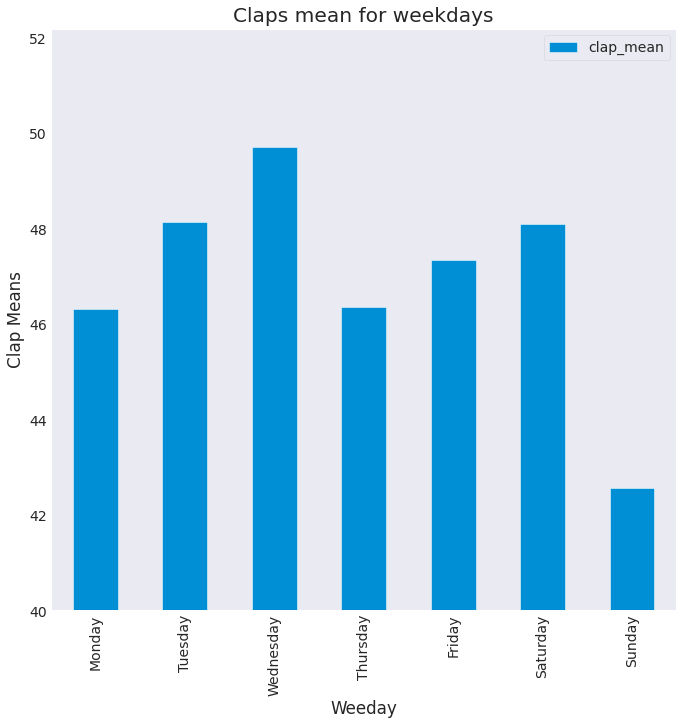

In [20]:
import seaborn as sns
import matplotlib
matplotlib.style.use('fivethirtyeight') 

sns.set_style("dark")
df_weekday.sort_values('week_number',ascending=True).plot.bar(y='clap_mean')

plt.ylim(bottom=40)
plt.title("Claps mean for weekdays")
plt.xlabel("Weeday")
plt.ylabel("Clap Means")